
# Project: The Movies Database (TMDB) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p>The data of 10000 movies were collected from The Movies Database (TMDB). This dataset countains information about these movies including their titles, budget, popularity, revenue, cast, homepage, director, genre, and release_year.
The information regarding both budget and revenue exist in both original and adjusted values according to the rates of 2010. Our goal is to invesitgate the revenue of movies how it relates to genre, budget, and production companeis  </p>
 
<p>For our analysis we will answer the following questions:
<li> Which movies have the highest and lowest revenue? How does revenue relate to revenue categories? </li>
    <li> Which movies had greatest losses and which made largest profits? How did profit change through the years? </li>
    <li> Which year has the largest sum of vote_count ? and which movie? How does vote_count relate to other variables?  </li>
    <li> Who are the top directors in terms of their films' revenue and popularity? How did the list of the top 3 change with time? </li>
</p>


In [1]:
# importing the packages necessary for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Gathering and Assessing Dataset
First, we view the first and last few columns of the data to observe data structure in general. Then we explore data types and values that would exist. Finally, we clean the data by converting data types, droping columns, handeling null values irrelavent to our analysis and posed questions, and resturcturing the data when required. 

In [2]:
# Loading data and printing out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#investigate the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Creating a function to invistigate unique values and display the first 30 of those for a column
def unique_30(df,col):
    return df[col].unique()[0:30]
    

In [5]:
#investigating unique values for genres, director and production_companies
cols = ['director','genres','production_companies']
for col in cols:
    print(col,": ", unique_30(df,col))
    

director :  ['Colin Trevorrow' 'George Miller' 'Robert Schwentke' 'J.J. Abrams'
 'James Wan' 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu' 'Alan Taylor' 'Ridley Scott'
 'Kyle Balda|Pierre Coffin' 'Pete Docter' 'Sam Mendes'
 'Lana Wachowski|Lilly Wachowski' 'Alex Garland' 'Chris Columbus'
 'Joss Whedon' 'Quentin Tarantino' 'Olivier Megaton' 'Peyton Reed'
 'Kenneth Branagh' 'Francis Lawrence' 'Brad Bird' 'Antoine Fuqua'
 'Brad Peyton' 'Sam Taylor-Johnson' 'Adam McKay' 'Christopher McQuarrie'
 'Seth MacFarlane' 'Matthew Vaughn' 'Tom McCarthy' 'Wes Ball']
genres :  ['Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' 'Action|Crime|Thriller'
 'Western|Drama|Adventure|Thriller'
 'Science Fiction|Action|Thriller|Adventure'
 'Drama|Adventure|Science Fiction' 'Family|Animation|Adventure|Comedy'
 'Comedy|Animation|Family' 'Action|Adventure|Crime'
 'Science Fiction|Fantasy|Action|Adventure' 'Drama|Science Fiction'
 'Action|Comedy|Scienc

We find that many recordes in genres, director, and production companies columns contain several values separated by |. For our purposes we will get the first value of each record for the three columns in the cleaning process.

In [6]:
#looking for duplicates
df[df.duplicated()==True].index

Int64Index([2090], dtype='int64')

Through iteration analysing data, zero values for budget and revenue were discovered. We get the number of rows with zero values.

In [7]:
#check for zero values in the budget column
df.query('budget==0').budget.count()

5696

In [8]:
#check for zero values in the budget column
df.query('revenue==0').revenue.count()

6016

We conclude from the assessment that the data need the following specific operations:
<li> Drop imdb_id, cast, home,page, tagline, keywords, overview columns because they contain data that we do not need to answer our questions</li>
<li> Change the type of budget and revenue columns from int64 to float64.</li>
<li> Remove duplicate values in row 2090 </li>
<li> Fix null values in the remaining columns</li>
<li> Drop the rows where budget and revenue are zero valued</li>
<li> Separate the values in genres and directors, production companies columns and consider the main values only (first value) </li>


### Data Cleaning : Drop Columns, Drop nulls and zeros, Drop duplicates, change data types, and restructure columns

Now we perform the needed cleaning.

#### Dropping Extraneous Columns

In [9]:
# Droping unneeded columns
col_to_drop = ['imdb_id','cast', 'homepage', 'tagline', 'overview', 'keywords','overview','runtime','release_date']
df.drop(columns= col_to_drop, axis=1, inplace=True)

#confirm changes
df.head(1)

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Changing Data Types

In [10]:
#Changing data types
df['budget']=df['budget'].astype(float)
df['revenue']=df['revenue'].astype(float)
df['revenue_adj']=df['revenue_adj'].astype(float)

# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  float64
 3   revenue               10866 non-null  float64
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ MB


#### Removing Duplicates

In [11]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

#### Restructuring 'director','genres', and 'production_companies' Columns

In [12]:
#To restructure a column and get the first value of that column for each record, we create a function
def split_col_values(col, separator):
    ''' This function splits the data in a column separated by some character and returns the first value to that column'''
    df[col]=df[col].str.split(str(separator)).str[0]
    

In [13]:
# Restructuring 'director','genres', and 'production_companies' for our analysis
cols = ['director','genres','production_companies']
for col in cols:
    split_col_values(col,'|')
#confirm changes
df.head(1)

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Droping null and zero Values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  float64
 3   revenue               10865 non-null  float64
 4   original_title        10865 non-null  object 
 5   director              10821 non-null  object 
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.2+ MB


In [15]:
# Droping rows with zero values in the budget_adj column or the budget column
df = df.query('budget_adj >0 & budget>0')

#confirm changes
df['budget_adj'].min()

0.921091050771459

In [16]:
# Droping rows with zero values in the revenue or revenue_adj columns
df = df.query('revenue >0 & revenue_adj>0')

#confirm changes
df['revenue_adj'].min()

2.37070528956505

Through iteration of the data analysis process, some movies appeared to have a budget that was tens, hunderds and thousands times or bigger than the revenue, investigating some of these movies, it turned out that they had large revenue but the data was inaccurate, some had only few hunderd dollars revenue which was false. Setting a cutoff ratio was seen as a reasonable solution(the cutoff choice is based on observation, this needs further improvement probably through machine learning to observe which movies have erraneous data.) We chose to use budget and revenue instead of their adjusted values to avoid removing recent movies with real high values of budget.

#### Revenue and Budget Cutoff Values

In [17]:
# Defining a funciton to plot the distribution around the suspected cutoff
def cut_off_plot(df,col,operation , cutoff):
    df.query(str(col)+str(operation)+str(cutoff))[col].hist(figsize=(8,8),bins = 20)
    

In [18]:
# Defining a function to drop columns below cutoffs
def drop_below_cutoff(df,col, operation, value):
    df = df.query(str(col)+str(operation)+str(value))
 

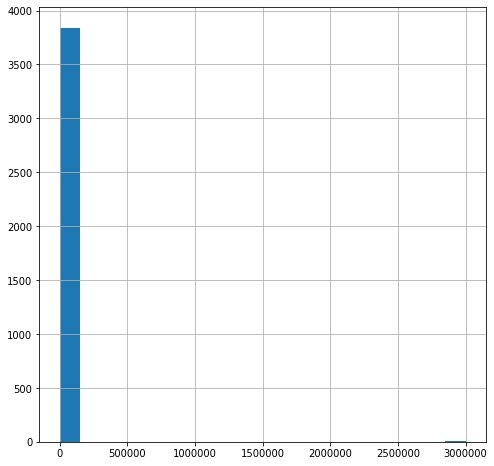

In [19]:
# Investigating the dirtriubtion of the ratio between budget and revenue
df['budget_rev_ratio'] = df['budget']/df['revenue']
cut_off_plot(df,'budget_rev_ratio',"<", df['budget_rev_ratio'].max())

As we can see from the graph, there are some movies that have 3000,000 time more budget than the revenue, so we try values below 200

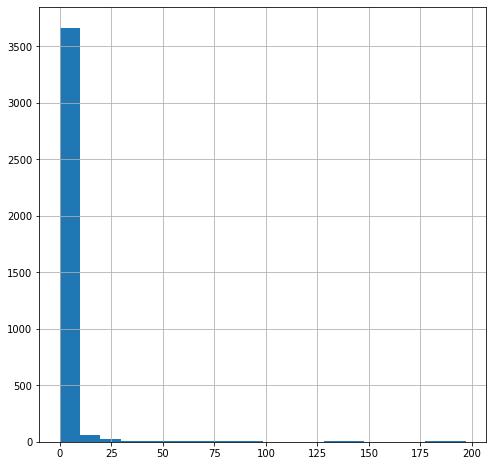

In [20]:
# Investigating a much lower value of cut_off
cut_off_plot(df,'budget_rev_ratio',"<", 200
            )

We choose our value to be 50 as the cutoff and drop columns with more than this value as a ratio between budget and revenue

In [21]:
#removing movies with ratio of >50 between budget and revenue
drop_below_cutoff(df,'budget_rev_ratio', '<', 50)

#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   popularity            3854 non-null   float64
 2   budget                3854 non-null   float64
 3   revenue               3854 non-null   float64
 4   original_title        3854 non-null   object 
 5   director              3853 non-null   object 
 6   genres                3854 non-null   object 
 7   production_companies  3808 non-null   object 
 8   vote_count            3854 non-null   int64  
 9   vote_average          3854 non-null   float64
 10  release_year          3854 non-null   int64  
 11  budget_adj            3854 non-null   float64
 12  revenue_adj           3854 non-null   float64
 13  budget_rev_ratio      3854 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 451.6+ KB


We also found that the minimum of the budget_adj was 0.9 and minimum of revenue_adj was 2.73. We will investigate cut_off value for budget and revenue columns which will certainly have much less values.

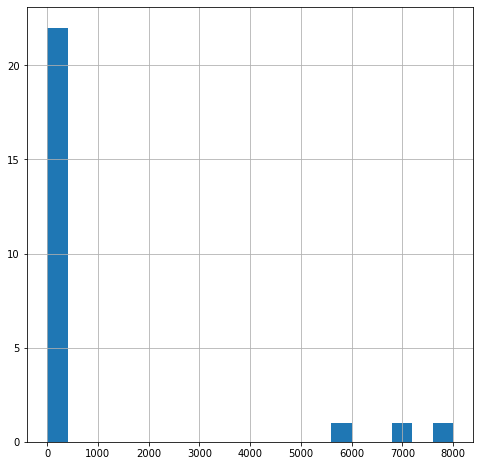

In [22]:
# getting the distribution of small budget values
df.query('budget<10000').budget.hist(figsize=(8,8),bins = 20);

We set another cut off for budget of 5000 and remove data with less budget.

In [23]:
#we set a threshold of 5000 $ budget
df=df.query('budget >5000')

#confirming changes
df['budget'].min()

6000.0

Similarly, we investigate the threshold for revenue

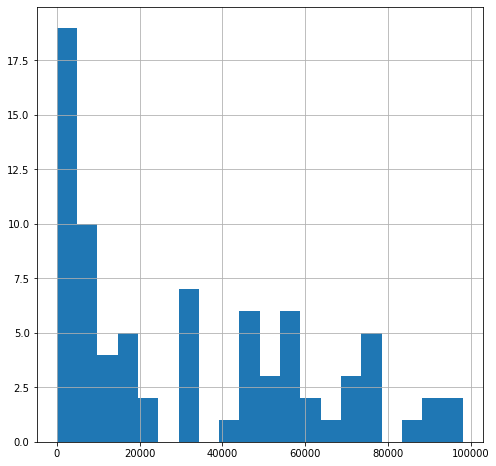

In [24]:
# investigating small values of revenue
df.query('revenue<100000').revenue.hist(figsize=(8,8),bins = 20)

In [25]:
# we set a threshold of 20000 $ reveune
df = df.query('revenue >20000')

#confirming changes
df['budget'].min()

7000.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3794 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3794 non-null   int64  
 1   popularity            3794 non-null   float64
 2   budget                3794 non-null   float64
 3   revenue               3794 non-null   float64
 4   original_title        3794 non-null   object 
 5   director              3793 non-null   object 
 6   genres                3794 non-null   object 
 7   production_companies  3752 non-null   object 
 8   vote_count            3794 non-null   int64  
 9   vote_average          3794 non-null   float64
 10  release_year          3794 non-null   int64  
 11  budget_adj            3794 non-null   float64
 12  revenue_adj           3794 non-null   float64
 13  budget_rev_ratio      3794 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 444.6+ KB


In [27]:
# Droping rows with null values in the director column and saving it to a separate dataframe
df_dir = df.dropna(subset=['director'])
#droping director from df
df.drop('director', axis=1, inplace = True)
# Droping rows with null values in the production_companies column and saving it to a separate dataframe
df_prod_com = df.dropna(subset=['production_companies'])
#droping production_companies from df
df.drop('production_companies', axis=1, inplace = True)

In [28]:
#Checking df 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3794 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3794 non-null   int64  
 1   popularity        3794 non-null   float64
 2   budget            3794 non-null   float64
 3   revenue           3794 non-null   float64
 4   original_title    3794 non-null   object 
 5   genres            3794 non-null   object 
 6   vote_count        3794 non-null   int64  
 7   vote_average      3794 non-null   float64
 8   release_year      3794 non-null   int64  
 9   budget_adj        3794 non-null   float64
 10  revenue_adj       3794 non-null   float64
 11  budget_rev_ratio  3794 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 385.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

In [29]:
# Exploring the dataframe df statitically
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_rev_ratio
count,3794.000000,3794.000000,3.794000e+03,3.794000e+03,3794.000000,3794.000000,3794.000000,3.794000e+03,3.794000e+03,3794.000000
mean,39568.376911,1.203017,3.766178e+07,1.093568e+08,534.717712,6.174618,2001.223511,4.478859e+07,1.391677e+08,3.373156
std,67092.169643,1.483508,4.232636e+07,1.774161e+08,884.966281,0.792239,11.305182,4.487647e+07,2.171294e+08,24.477057
min,5.000000,0.001117,7.000000e+03,2.038000e+04,10.000000,2.200000,1960.000000,7.755184e+03,2.132676e+04,0.000078
25%,5957.750000,0.467309,1.000000e+07,1.458059e+07,74.000000,5.700000,1995.000000,1.357211e+07,1.957982e+07,0.237111
50%,11259.500000,0.811387,2.500000e+07,4.641948e+07,209.000000,6.200000,2004.000000,3.039101e+07,6.329843e+07,0.467722
75%,38320.500000,1.388134,5.000000e+07,1.264721e+08,584.750000,6.700000,2010.000000,6.094840e+07,1.658238e+08,1.106760
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,881.882072


We notice that all columns have a high maximum comapred to mean value, implying that data is right-skewed.

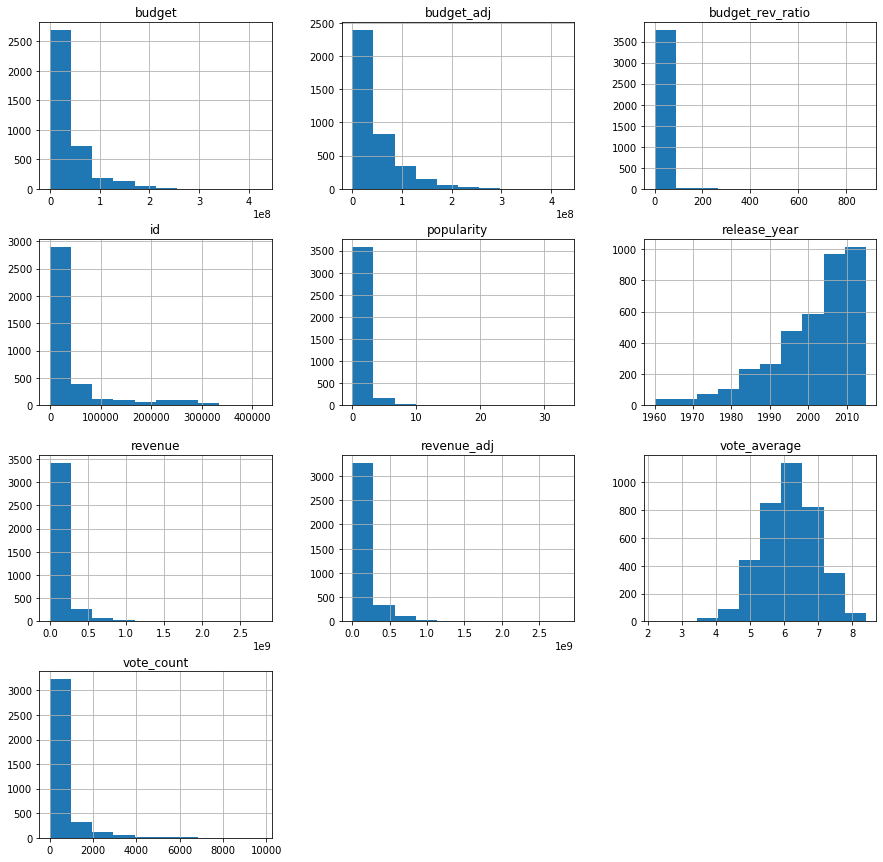

In [30]:
#Comfirming Right-skewedness in our data 
df.hist(figsize=(15,15));

We observe right-skewedness in all values except for release_year and vote_average.
Release_year is left skewed as number of movies produced increased with time.
Vote_average is almost normally distributed. 

### Research Question 1: Which movies have the highest and lowest revenue? How does revenue relate to revenue categories?

Within this question, the values we will use are adjusted revenue and budget, this will ensure a more fair comparison between variables.

In [31]:
#setting index into original_title
df.set_index('original_title', inplace=True)

In [32]:
#exploring the movies with the highest revenue(adjusted)
top_20=df.nlargest(20,'revenue_adj')
top_20

,id,popularity,budget,revenue,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_rev_ratio
original_title,,,,,,,,,,,
Avatar,19995,9.432768,237000000.0,2.781506e+09,Action,8458,7.1,2009,2.408869e+08,2.827124e+09,0.085206
Star Wars,11,12.037933,11000000.0,7.753980e+08,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09,0.014186
Titanic,597,4.355219,200000000.0,1.845034e+09,Drama,4654,7.3,1997,2.716921e+08,2.506406e+09,0.108399
The Exorcist,9552,2.010733,8000000.0,4.413061e+08,Drama,1113,7.2,1973,3.928928e+07,2.167325e+09,0.018128
Jaws,578,2.563191,7000000.0,4.706540e+08,Horror,1415,7.3,1975,2.836275e+07,1.907006e+09,0.014873
Star Wars: The Force Awakens,140607,11.173104,200000000.0,2.068178e+09,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,0.096703
E.T. the Extra-Terrestrial,601,2.900556,10500000.0,7.929106e+08,Science Fiction,1830,7.2,1982,2.372625e+07,1.791694e+09,0.013242
The Net,1642,1.136610,22000000.0,1.106280e+09,Crime,201,5.6,1995,3.148127e+07,1.583050e+09,0.019886
One Hundred and One Dalmatians,12230,2.631987,4000000.0,2.158800e+08,Adventure,913,6.6,1961,2.917944e+07,1.574815e+09,0.018529


In [33]:
#exploring the movies with the lowest revenue
low_20=df.nsmallest(20,'revenue_adj')
low_20

,id,popularity,budget,revenue,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_rev_ratio
original_title,,,,,,,,,,,
The Divide,38541,0.189663,3000000.0,22000.0,Science Fiction,86,5.6,2011,2.908194e+06,21326.756937,136.363636
The Good Night,13501,0.323370,15000000.0,20380.0,Comedy,16,5.5,2007,1.577503e+07,21433.005714,736.015702
Jimmy P.,160768,0.457768,10000000.0,30283.0,Drama,18,4.6,2013,9.360334e+06,28345.898021,330.218274
Maniac,103620,0.913638,6000000.0,31081.0,Horror,189,5.8,2012,5.698466e+06,29519.002009,193.043982
Song One,244783,0.407983,6000000.0,32251.0,Drama,58,5.7,2014,5.526546e+06,29706.107478,186.040743
L!fe Happens,91070,0.372627,930000.0,30905.0,Comedy,47,5.2,2011,9.015402e+05,29959.246506,30.092218
The Tracey Fragments,16725,0.144186,700000.0,31576.0,Drama,17,5.9,2007,7.361680e+05,33207.487165,22.168736
Stake Land,52015,0.259600,650000.0,33245.0,Drama,143,6.2,2010,6.500000e+05,33245.000000,19.551812
The Boondock Saints,8374,0.992316,6000000.0,30471.0,Action,521,7.1,1999,7.854317e+06,39888.149289,196.908536


From this analysis, the movie with the highest adjusted revenue is Avatar, while the one with the lowest is The Romantics.

In [34]:
# constructing a function to plot bar graphs for data frame grouped by a column and aggregated by another
def plot_bar_groups(groupby_col, agg_col):
    
    df.groupby(groupby_col)[agg_col].sum().sort_values().plot.bar(figsize=(10,10));
    

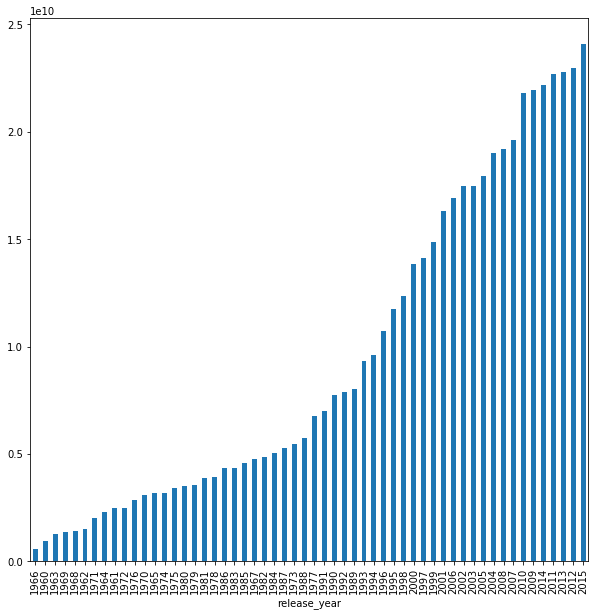

In [35]:
# Now we investigate the revenue_adj for each year
revenue_yearly = plot_bar_groups('release_year', 'revenue_adj')

 How does movies revenues per year affect the total revenue? 
 We divide the data into three categories and see which is more correlated to the total revenue in a certain year. The categories are:
1. Movies with revenues more than 1B  $'rev >=1B'$
2.  Movies with revenue between 500 M and 1B  $ 'rev >0.5B \& <1B' $
3. Movies with revenue less than 500M  $ 'rev < 0.5B' $


In [36]:
#Constructing dataframe that includes revenue_adj and its components of revenue category as described above.
year_rev1 = pd.DataFrame(0, index=df.reset_index().release_year.unique(),\
                         columns=['rev >=1B', 'rev >0.5B & <1B', 'rev < 0.5B', 'revenue_adj'])

In [37]:
#Definig a function to get the sum of revenue per revenue category
def revenue_per_cat(constructed_df,col, df_to_aggregate, col_to_groupby, col_to_aggregate, condition):
    constructed_df[col]= df_to_aggregate.reset_index().query(condition).groupby(col_to_groupby)[col_to_aggregate].sum()

In [38]:
# obtaining the revenue per revenue category
col_condition=[('rev >=1B',"revenue_adj >=1000000000"),\
               ('rev >0.5B & <1B'," revenue_adj >= 500000000 and revenue_adj <1000000000"),\
               ('rev < 0.5B',"revenue_adj < 500000000")]
for i in col_condition:
    revenue_per_cat(year_rev1, i[0], df, 'release_year','revenue_adj',i[1])

In [39]:
# adding revenue_adj to year_rev
year_rev1['revenue_adj']= df.groupby('release_year')['revenue_adj'].sum()

In [40]:
# fill nan from grouping process with 0
year_rev1.fillna(0, inplace= True);

In [41]:
# Checking new dataframe
year_rev1.head()

,rev >=1B,rev >0.5B & <1B,rev < 0.5B,revenue_adj
2015,7.037742e+09,3.893685e+09,1.317523e+10,2.410666e+10
2014,0.000000e+00,7.365604e+09,1.480501e+10,2.217061e+10
1977,3.882677e+09,1.520249e+09,1.368668e+09,6.771594e+09
2009,2.827124e+09,5.480224e+09,1.365412e+10,2.196146e+10
2010,2.088639e+09,4.990140e+09,1.472558e+10,2.180436e+10


In [42]:
#confirm changes: total revenue_adj = revenue from 3 categories
(year_rev1['rev >=1B'] + year_rev1['rev >0.5B & <1B']+ year_rev1['rev < 0.5B']).map('${:,.2f}'.format).sum()\
    == year_rev1['revenue_adj'].map('${:,.2f}'.format).sum()

True

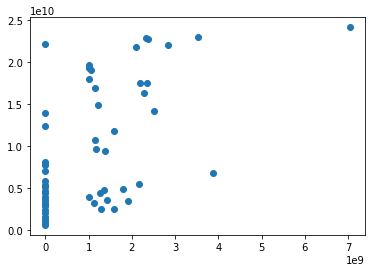

In [43]:
# Exploring relation between revenue_adj and category of movies > 1B$ (rev >=1B)
plt.scatter(x=year_rev1['rev >=1B'],y=year_rev1['revenue_adj'])

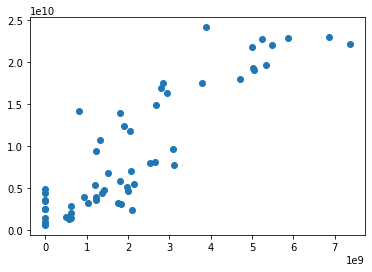

In [44]:
# Exploring relation between revenue_adj and category of movies between 1B$ and .5B (rev >0.5B & <1B)
plt.scatter(x=year_rev1['rev >0.5B & <1B'],y=year_rev1['revenue_adj'])

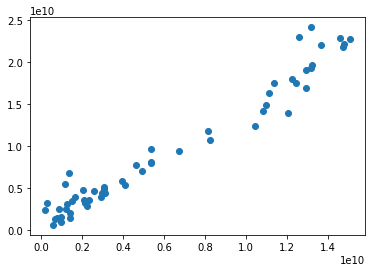

In [45]:
# Exploring relation between revenue_adj and category of movies < 0.5B$ (rev < 0.5B)
plt.scatter(x=year_rev1['rev < 0.5B'],y=year_rev1['revenue_adj'])

In [46]:
# Finding the correlation_coefficient between revenu_adj and different revenue categories
revenue_category_corr =year_rev1.corr()

### Research Question 2:  Which movies had greatest losses and which made largest profits? How did profit change through the years?

In [47]:
# creating profit% column
df['profit']=(df['revenue_adj']-df['budget_adj'])*100/df['budget_adj'] ;

In [48]:
#getting the top 10 movies high in profit
top_profit = df.nlargest(10,'profit')

In [49]:
#getting the lowest 10 movies in profit
low_profit = df.nsmallest(10,'profit')

The movie with the greatest profits was Paranormal Activity with $1.289 *{10}^{6}$  %, while that with losses was Foodfight! with 99.89% loss

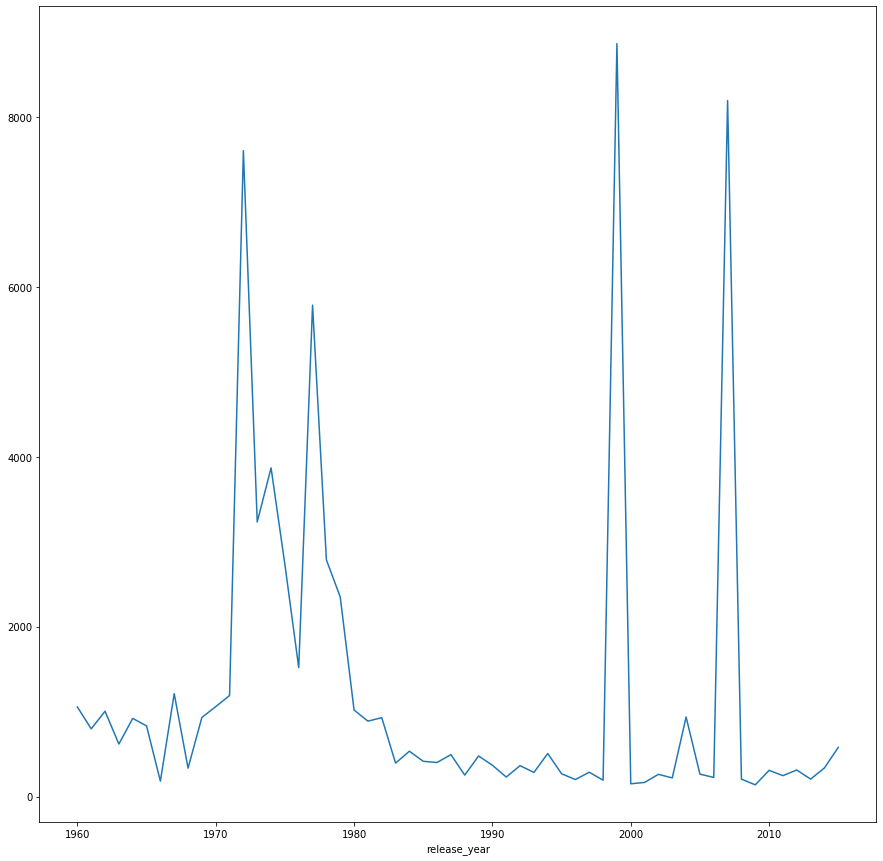

In [50]:
# We investigate the mean value of profit across the years
mean_profit = df.groupby('release_year')['profit'].mean()
mean_profit_plot = mean_profit.plot.line(figsize=(15,15));

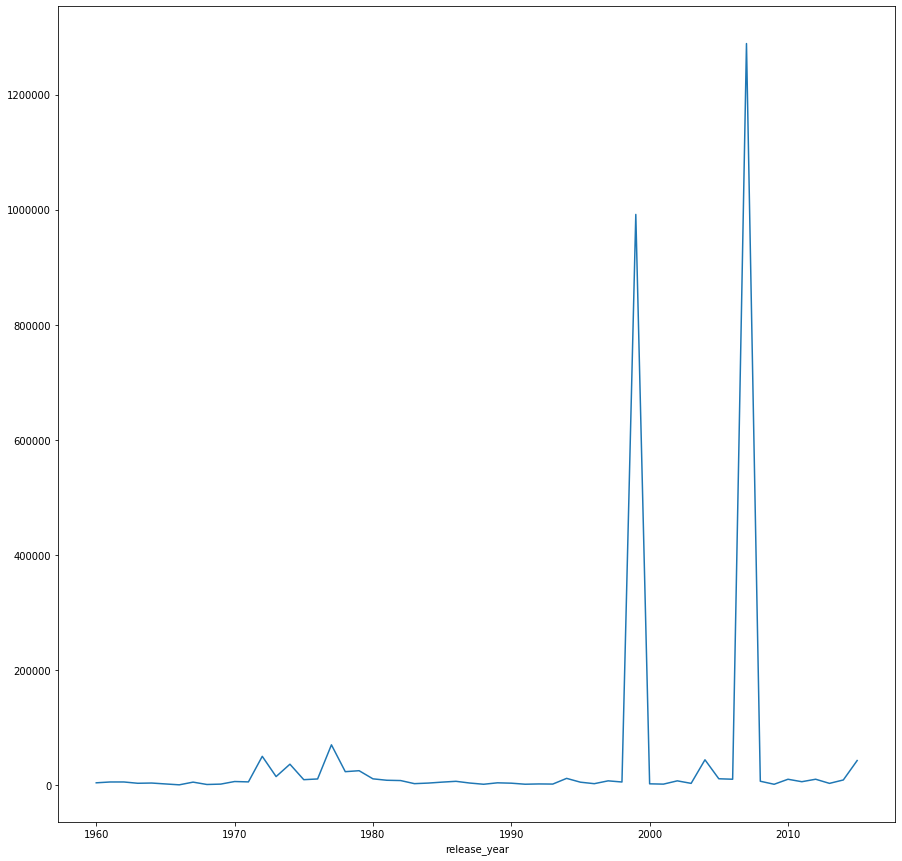

In [51]:
# maximum profit value each year
max_profit = df.groupby('release_year')['profit'].max()
max_profit_plot = max_profit.plot.line(figsize=(15,15))

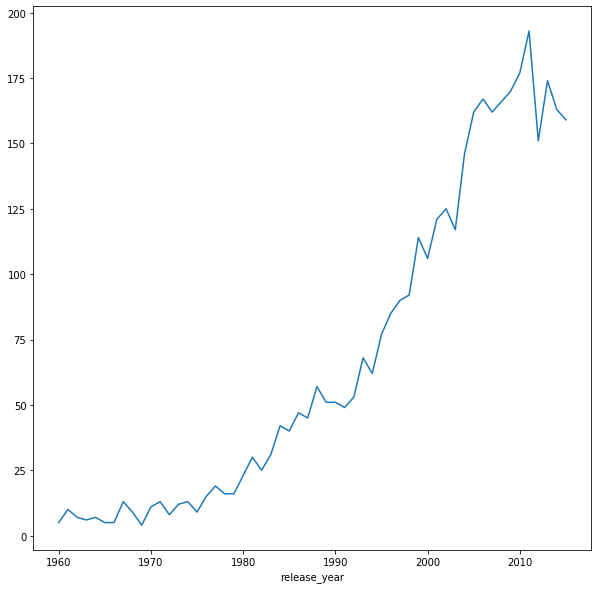

In [52]:
# number of movies each year
movies_count = df.groupby('release_year')['id'].count()
movies_count_plot = movies_count.plot.line(figsize=(10,10));

It seems that the mean and median profit values have a general decreasing trend, with peaks. 

For the peaks 1990-2010, the mean profit values per year have several peaks including in 1999 and 2007. These peaks are a result of the maximum values for those years which are much higher than the rest of the data, pulling the mean up but it's much smaller than max values bacause of the effect of number of movies produced in these years.

However, the peaks in the period 1970-1980 are a result of the small number of movies produced, which make the effect of the movies with large profit values evident.

### Research Question 3 : Which year has the largest sum of vote_count ? and which movie? How does vote_count relate to other variables?


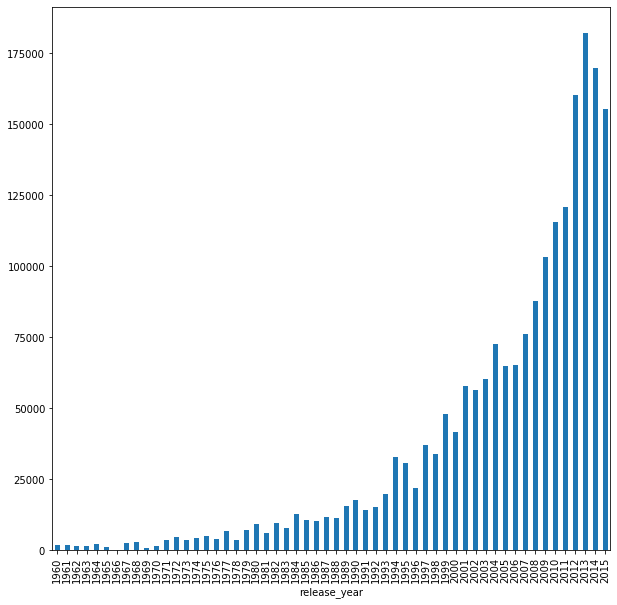

In [53]:
# Computing the vote_count totals per year
sum_vote_count = df.groupby('release_year')['vote_count'].sum()
sum_vote_count.plot(kind = 'bar', figsize=(10,10));

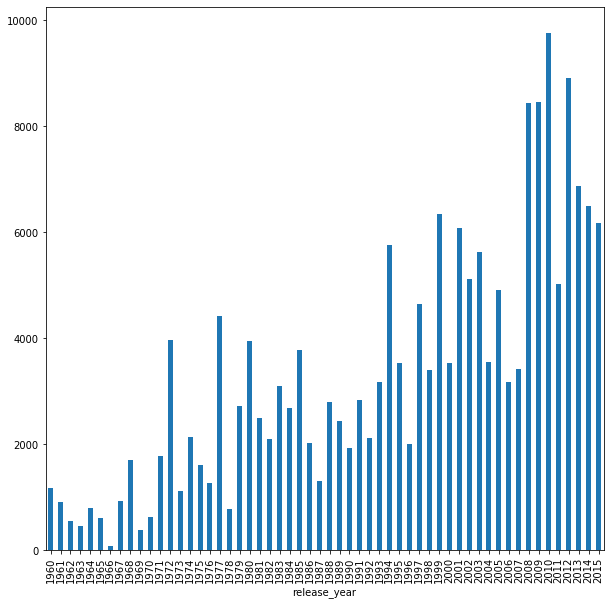

In [54]:
# Computing the vote_count totals per year
max_vote_count = df.groupby('release_year')['vote_count'].max()
max_vote_count.plot(kind = 'bar', figsize=(10,10));

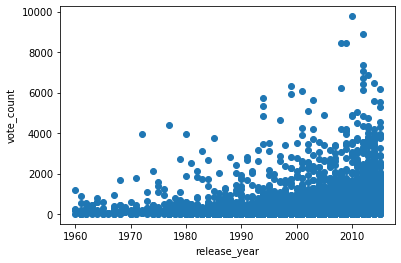

In [55]:
# plotting scatter for popularity vs. vote_count
plt.scatter(x= df['release_year'],y=df['vote_count']);
plt.xlabel('release_year');
plt.ylabel('vote_count');

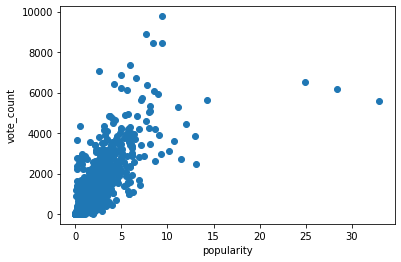

In [56]:
# plotting scatter for popularity vs. vote_count
plt.scatter(x= df['popularity'],y=df['vote_count']);
plt.xlabel('popularity');
plt.ylabel('vote_count');

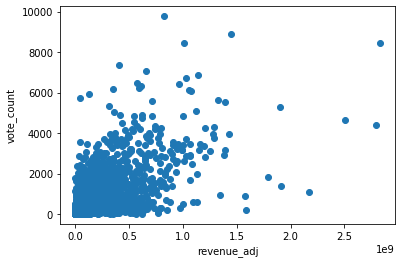

In [57]:
# plotting scatter for popularity vs. vote_count
plt.scatter(x= df['revenue_adj'],y=df['vote_count']);
plt.xlabel('revenue_adj');
plt.ylabel('vote_count');

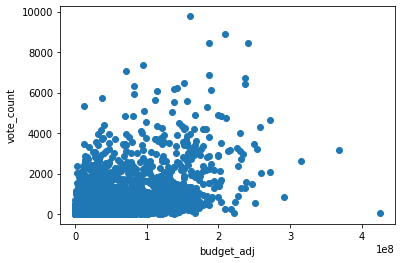

In [58]:
# plotting scatter for popularity vs. vote_count
plt.scatter(x= df['budget_adj'],y=df['vote_count']);
plt.xlabel('budget_adj');
plt.ylabel('vote_count');

Vote_count is moderately correlated with revenue_adj and budget_adj variable and strongly correlated with popularity.

In [59]:
#investigatin correlation with all other variables numerically
vote_count_corr = df.corr().loc[:,'vote_count']

We find that the strongest correlation vote_count has, is indeed with popularity and equals .779

### Research Question 4: Who are the top directors in terms of their films' revenue and popularity? Who made it to the list of the top 3 change over the last 10 years of the data?

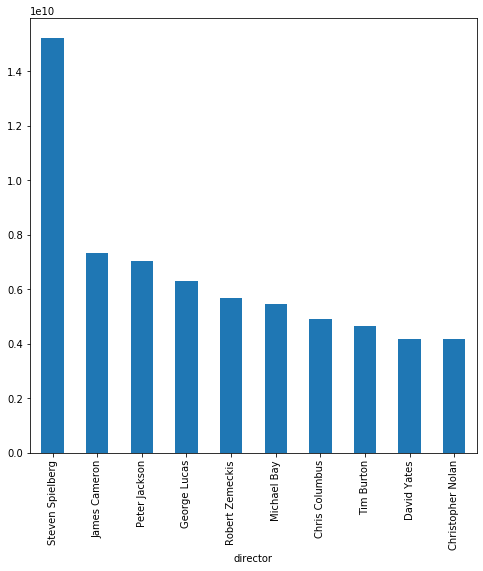

In [60]:
# Plotting the total revenue_adj for every director
director_revenue = df_dir.groupby('director')['revenue_adj'].sum()
director_revenue.sort_values(ascending=False).nlargest(10).plot.bar(figsize=(8,8));


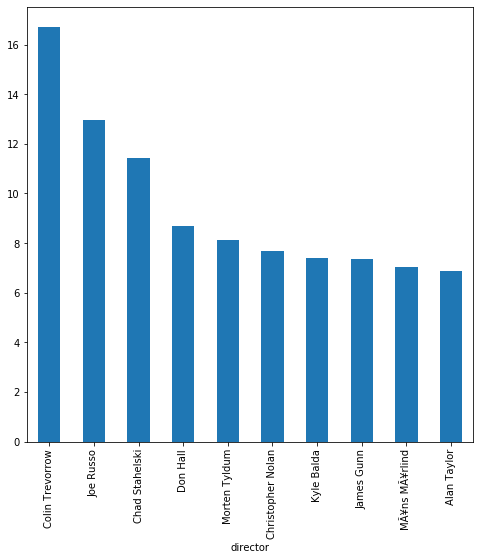

In [61]:
# Plotting the average popularity of movies for every director
director_popularity = df_dir.groupby('director')['popularity'].mean()
director_popularity.sort_values(ascending=False).nlargest(10).plot.bar(figsize=(8,8));


The director whose movies have the highest sum of adjusted revenue is Steven Spielberg, while that with highest average popularity to his films is Collin Trevorrow.

Who made it to the top 3 in revenue for the last 10 years of the data

In [62]:
# Getting the top 3 directors in each year with resepct to the revenue_adj
dir_list_top_rev=pd.DataFrame(df_dir.groupby(['release_year','director'])['revenue_adj'].sum().groupby(level=0,group_keys=False).nlargest(3)[-1:-31:-1])
#Finding the number of times each name appeared in that list
dir_list_top_rev=dir_list_top_rev.reset_index()['director'].value_counts().rename('total_revenue')
dir_list_top_rev

David Yates          4
Carlos Saldanha      2
Gore Verbinski       2
Christopher Nolan    2
Pierre Coffin        1
Peter Jackson        1
Sam Raimi            1
James Gunn           1
Robert Stromberg     1
Lee Unkrich          1
Michael Bay          1
Chris Buck           1
J.J. Abrams          1
Sam Mendes           1
James Cameron        1
Steven Spielberg     1
Rob Marshall         1
Colin Trevorrow      1
James Wan            1
Mark Osborne         1
Ron Howard           1
Shane Black          1
Tim Burton           1
Joss Whedon          1
Name: total_revenue, dtype: int64

In [63]:
# Getting the top 3 directors in each year with resepct to the popularity
dir_list_toppop=pd.DataFrame(df_dir.groupby(['release_year','director'])['popularity'].mean().groupby(level=0,group_keys=False).nlargest(3)[-1:-31:-1])
#Finding the number of times each name appeared in that list
dir_list_toppop=dir_list_toppop.reset_index()['director'].value_counts().rename('popularity_avg')
dir_list_toppop

Christopher Nolan       4
Gore Verbinski          2
Jon Favreau             2
David Yates             2
Chris Buck              1
Robert Schwentke        1
James Cameron           1
John Lasseter           1
Patrick Tatopoulos      1
James Gunn              1
Tim Burton              1
Joe Russo               1
Brad Bird               1
Len Wiseman             1
Alan Taylor             1
Joe Johnston            1
Alfonso CuarÃ³n         1
George Miller           1
Colin Trevorrow         1
MÃ¥ns MÃ¥rlind          1
Andrew Stanton          1
Quentin Tarantino       1
Nicolas Winding Refn    1
Joss Whedon             1
Name: popularity_avg, dtype: int64

In [64]:
# Construct dataframe with number of times director appeared in the top 3 list for either total_revenue or popularity_avg
top_directors  = pd.concat([dir_list_top_rev,dir_list_toppop], axis = 1).fillna(0)

<a id='conclusions'></a>
## Conclusions


In this section, we conlude our findings for each question posed during the analysis process.
<p> Some limitations due to the cleaning process are:
    <li> The cutoff ratio and values chosen were based on observation from bar charts </li>
    <li> The eraneous values of budget and revenue from the database led to removal of rows, whose values if correct might have changed the current analysis results</li>
    <li> Due to lack of data in some columns, many records (more than 60%) were dropped. This can cause a large error in values of analyzed variables and some game changer values may have been dropped.</li>
    

### Research Question 1: Which movies have the highest and lowest revenue? How does revenue relate to number of movies exceeding billion dollars that year and other revenue ranges?

In [65]:
#The movie with largest revenue_adj
top_20.index[0], top_20.loc[top_20.index[0]]

('Avatar',
 id                        19995
 popularity              9.43277
 budget                 2.37e+08
 revenue             2.78151e+09
 genres                   Action
 vote_count                 8458
 vote_average                7.1
 release_year               2009
 budget_adj          2.40887e+08
 revenue_adj         2.82712e+09
 budget_rev_ratio      0.0852056
 Name: Avatar, dtype: object)

In [66]:
#The movie with least revenue_adj
low_20.index[0], low_20.loc[low_20.index[0]]

('The Divide',
 id                            38541
 popularity                 0.189663
 budget                        3e+06
 revenue                       22000
 genres              Science Fiction
 vote_count                       86
 vote_average                    5.6
 release_year                   2011
 budget_adj              2.90819e+06
 revenue_adj                 21326.8
 budget_rev_ratio            136.364
 Name: The Divide, dtype: object)

Dividing the revenue_adj into 3 categories and finding the correlation between them.

In [67]:
revenue_category_corr

,rev >=1B,rev >0.5B & <1B,rev < 0.5B,revenue_adj
rev >=1B,1.000000,0.344180,0.439205,0.567746
rev >0.5B & <1B,0.344180,1.000000,0.819724,0.882056
rev < 0.5B,0.439205,0.819724,1.000000,0.977125
revenue_adj,0.567746,0.882056,0.977125,1.000000


<p> revenue_adj is more correlated to movies of category less than 0.5 billion dollars. </p>

### Research Question 2:  Which movies had greatest losses and which made largest profits? How did profit change through the last 10 years?

comparing the movie with top profit percentage to that with the least profit percentage (loss).

In [68]:
top_movie =top_profit['profit'].index[0] # name of movie with highest profit
top_profit_val = top_profit['profit'].iloc[0] # value of highest profit
low_movie = low_profit['profit'].index[0]  # name of movie with lowest profit
low_profit_val = low_profit['profit'].iloc[0] # value of lowest profit
#showing values in dataframe
pd.DataFrame({'name': [top_movie, low_movie],'profit_val': [top_profit_val, low_profit_val]})

,name,profit_val
0,Paranormal Activity,1.288939e+06
1,Foodfight!,-9.988661e+01


Paranormal activity is the movies with highest profit with over a million percent. Foodfight has a loss of 99.89%.

The overall trend of mean profit values is decreasing with some peaks. 

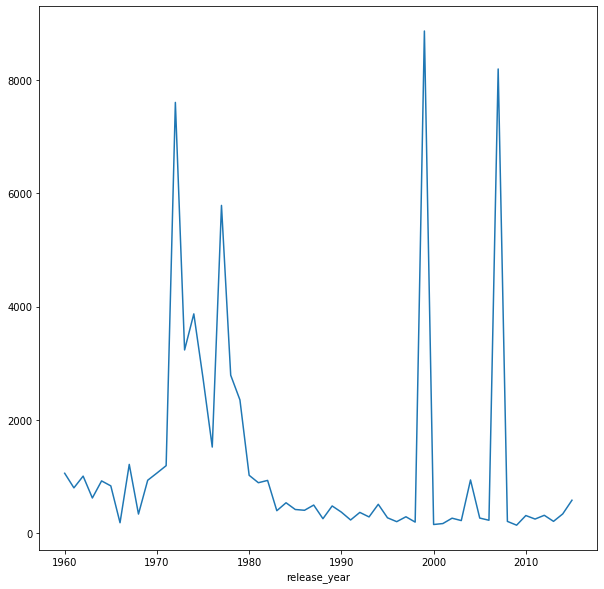

In [69]:
# plot mean profit values across the years
mean_profit.plot.line(figsize=(10,10));


The peaks can be understood when looking at the maximum profit and movie numbers each year

In [70]:
# construct dataframe for max_profit and movies_count for each year.
profit_count = pd.concat([max_profit,movies_count], axis=1).rename(columns={'profit': 'max_profit','id':'movies_count'})
# finding the first 10 movies with highest max_profit
profit_count.nlargest(10,'max_profit')

,max_profit,movies_count
release_year,,
2007,1.288939e+06,162
1999,9.919000e+05,114
1977,6.990000e+04,19
1972,4.990000e+04,8
2004,4.386166e+04,146
2015,4.256441e+04,159
1974,3.620471e+04,13
1979,2.490000e+04,16
1978,2.323333e+04,16


From the table we can note that the peaks occur 2007, 1999, 1977, and 1972 and those peaks 1999-2010 have a large number of movies produced during their years of release. While the peaks in 1977 and 1972 have a low number of movies produced, causing the shape of our mean curve.

### Research Question 3 : Which year has the largest sum of vote_count ? and which movie? How does vote_count relate to other variables?

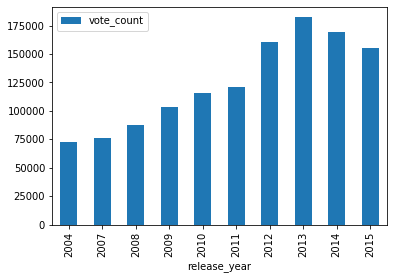

In [71]:
# Plotting the top 10 years in vote_count sum
top_sum_vote_count=pd.DataFrame(sum_vote_count.nlargest(10))
top_sum_vote_count.sort_index().plot.bar();

In [72]:
# Getting the maximum value
top_sum_vote_count.max()[0]

182219

As per bar chart, 2013 has the highest number of vote-count reaching 182,219 total votes. This result is not conclusive as the data we dropped had more movies than those we worked on.

In [73]:
#Getting the  movie with highest vote_count
df.loc[df['vote_count'].idxmax()]

id                      27205
popularity            9.36364
budget                1.6e+08
revenue             8.255e+08
genres                 Action
vote_count               9767
vote_average              7.9
release_year             2010
budget_adj            1.6e+08
revenue_adj         8.255e+08
budget_rev_ratio     0.193822
profit                415.938
Name: Inception, dtype: object

Inception is the movie with highest vote_count, receiving 9767 votes.

In [74]:
# How vote_count is correlated to other variables
vote_count_corr

id                  0.115638
popularity          0.779245
budget              0.554984
revenue             0.753591
vote_count          1.000000
vote_average        0.387547
release_year        0.210794
budget_adj          0.495469
revenue_adj         0.653221
budget_rev_ratio   -0.063861
profit              0.004976
Name: vote_count, dtype: float64

The vote_count is correlated to unadjsuted revenue the most with coefficient of 0.754 then to the revenue_adj with a moderate value of 0.653.

### Research Question 4: Who are the top directors in terms of their films' revenue and popularity? How did the list of the top 3 change with time?

For this question, the limitations of removal of many movies may have affected the results. 

First, we find the director whose movies had the highest revenue_adj total over the entire period of the data set

In [75]:
# find top_director in revenue
director_revenue.idxmax()

'Steven Spielberg'

In [76]:
#find value of highest revenue for movies of a director
director_revenue.max()

15202446786.618376

The top director with regard to revenue_adj is Steven Spielberg with 15 billion dollars total revenue_adj. Now, we find that in terms of his movies'average popularity

In [77]:
# find top_director in movies' popularity
director_popularity.idxmax()

'Colin Trevorrow'

In [78]:
#find value of highest revenue for movies of a director
director_popularity.max()


16.696886499999998

The top director with regard to movies' average popularity is Colin Trevorrow with average popularity of 16.7

Finding the directors who made it to the top 3 list in terms of total movies' revenue (adjusted values) and average popularity

In [79]:
# find director with most frequent appearance in the top 3 total_revenue's list and frequency
top_directors['total_revenue'].idxmax(), top_directors['total_revenue'].max()

('David Yates', 4.0)

In [80]:
# find director with most frequent appearance in the top 3 popularity_avg's list and frequency
top_directors['popularity_avg'].idxmax(), top_directors['popularity_avg'].max()

('Christopher Nolan', 4.0)

We find that David Yates had made it in 4 years to the top 3 list in terms of movies' revenue, while Christopher Nolan's movies were in the top 3 list in terms of movies' average popularity in 4 different years.